<a href="https://colab.research.google.com/github/rustproofpanda0/test_task/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import linear_model, preprocessing, metrics
from sklearn import tree, ensemble

In [2]:
pd.set_option('display.max_columns', None)  # or 1000


#отображение всехстрок таблицы или небольшой их части
# переклчал по необходимости

pd.set_option('display.max_rows', 1000)  # or 1000
# pd.set_option('display.max_rows', None)

In [5]:
energy_df = pd.read_csv('energy.csv', sep='\t')
plan_df_full = pd.read_csv('plan.csv', sep='\t')

In [6]:
energy_df # при просмотре файлов замечаем, что в energy.csv необходимо заменить запятые на точки

Дата Характерный день  Торговый час Характерный час  \
0      01.01.2015         выходной             0         минимум   
1      01.01.2015         выходной             1         минимум   
2      01.01.2015         выходной             2         минимум   
3      01.01.2015         выходной             3         минимум   
4      01.01.2015         выходной             4         минимум   
...           ...              ...           ...             ...   
26299  31.12.2017         выходной            19         полупик   
26300  31.12.2017         выходной            20         полупик   
26301  31.12.2017         выходной            21         полупик   
26302  31.12.2017         выходной            22         минимум   
26303  31.12.2017         выходной            23         минимум   

      График ППП, МВтч  \
0                 0,45   
1                 0,45   
2                 0,45   
3                 0,45   
4                 0,45   
...                ...   
26299                0   
26300                0   
26301                0   
26302                0   
26303                0   

      Объем Торгового графика (скорректированное плановое почасовое потребление) МВт*час  \
0                                                   0,45                                   
1                                                   0,45                                   
2                                                   0,45                                   
3                                                   0,45                                   
4                                                   0,45                                   
...                                                  ...                                   
26299                                                  0                                   
26300                                                  0                                   
26301                                                  0                                   
26302                                                  0                                   
26303                                                  0                                   

      Объем покупки МВт*час В т.ч. потери, отнесенные к объему покупки  \
0                     0,463                                      0,013   
1                     0,463                                      0,013   
2                     0,463                                      0,013   
3                     0,463                                      0,013   
4                     0,463                                      0,013   
...                     ...                                        ...   
26299                     0                                          0   
26300                     0                                          0   
26301                     0                                          0   
26302                     0                                          0   
26303                     0                                          0   

      Фактическое собственное потребление, МВтч  \
0                                         0,362   
1                                         0,355   
2                                         0,355   
3                                         0,355   
4                                         0,364   
...                                         ...   
26299                                     0,159   
26300                                     0,152   
26301                                     0,154   
26302                                     0,146   
26303                                     0,145   

      Покупка (+) / Продажа (-) на БР (BR+/-), МВтч  \
0                                            -0,088   
1                                            -0,095   
2                                            -0,095   
3                                            -0,095   
4

In [7]:
energy_df.dtypes # просматриваем типы данных в столбцах

Дата                                                                                  object
Характерный день                                                                      object
Торговый час                                                                           int64
Характерный час                                                                       object
График ППП, МВтч                                                                      object
Объем Торгового графика (скорректированное плановое почасовое потребление) МВт*час    object
Объем покупки МВт*час                                                                 object
В т.ч. потери, отнесенные к объему покупки                                            object
Фактическое собственное потребление, МВтч                                             object
Покупка (+) / Продажа (-) на БР (BR+/-), МВтч                                         object
Объем покупки на БР (BR+), МВтч                                       

In [8]:
str_mask = energy_df.dtypes == 'object' # для столбцов с типом object (все их них str) меняем запятые на точки
for col in energy_df.columns[str_mask]:
    energy_df[col] = energy_df[col].str.replace(',', '.')

In [9]:
cols_to_float = energy_df.columns[4:]
for col in cols_to_float:
    print(col)
    energy_df[col] = energy_df[col].astype(float)

График ППП, МВтч
Объем Торгового графика (скорректированное плановое почасовое потребление) МВт*час
Объем покупки МВт*час
В т.ч. потери, отнесенные к объему покупки
Фактическое собственное потребление, МВтч
Покупка (+) / Продажа (-) на БР (BR+/-), МВтч
Объем покупки на БР (BR+), МВтч
Объем продажи на БР (BR-), МВтч


ValueError: ignored

In [19]:
# пока что переведём в float то, что можно перевести
# код выше падает на последнем столбце, следовательно проблемы только в нём

cols_to_float = energy_df.columns[4:-1]
for col in cols_to_float:
    energy_df[col] = energy_df[col].astype(float)

In [20]:
# Просмотрев теблицу, увидим, что проблема последнего столбца
# в символах ' -     ' , которые стоят, предположительно, вместо нулей.
# проверим это

dash_tst_df = energy_df[energy_df['Объем продажи на БР (BR-), МВтч'] == ' -      ']

switch = True
for i in dash_tst_df['Покупка (+) / Продажа (-) на БР (BR+/-), МВтч'] >= 0:
    if (not i):
        print('less then 0')
        switch = False

# условие не сработало, следовательно на месте ' -     ' должны быть нули

if (switch):
    energy_df.replace(' -      ', '0.0', inplace=True)
    energy_df['Покупка (+) / Продажа (-) на БР (BR+/-), МВтч'] = energy_df[
              'Покупка (+) / Продажа (-) на БР (BR+/-), МВтч'].astype(float)

In [21]:
print(energy_df['Характерный час'].unique()) # проверяем остальные столбцы на наличие неправильных данных
print(energy_df['Характерный день'].unique())
print(energy_df['Торговый час'].unique())
# пока что оставим категориальные данные в таком виде

['минимум' 'полупик' 'пик']
['выходной' 'рабочий день']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [22]:
energy_df.dtypes # проверяем типы данных полученной таблицы

Дата                                                                                   object
Характерный день                                                                       object
Торговый час                                                                            int64
Характерный час                                                                        object
График ППП, МВтч                                                                      float64
Объем Торгового графика (скорректированное плановое почасовое потребление) МВт*час    float64
Объем покупки МВт*час                                                                 float64
В т.ч. потери, отнесенные к объему покупки                                            float64
Фактическое собственное потребление, МВтч                                             float64
Покупка (+) / Продажа (-) на БР (BR+/-), МВтч                                         float64
Объем покупки на БР (BR+), МВтч                             

In [23]:
energy_df['Дата'] = pd.to_datetime(energy_df['Дата'], dayfirst=True)
energy_df.rename({'Дата': 'DateTime'}, axis=1, inplace=True)

In [24]:
energy_df

DateTime Характерный день  Торговый час Характерный час  \
0     2015-01-01         выходной             0         минимум   
1     2015-01-01         выходной             1         минимум   
2     2015-01-01         выходной             2         минимум   
3     2015-01-01         выходной             3         минимум   
4     2015-01-01         выходной             4         минимум   
...          ...              ...           ...             ...   
26299 2017-12-31         выходной            19         полупик   
26300 2017-12-31         выходной            20         полупик   
26301 2017-12-31         выходной            21         полупик   
26302 2017-12-31         выходной            22         минимум   
26303 2017-12-31         выходной            23         минимум   

       График ППП, МВтч  \
0                  0.45   
1                  0.45   
2                  0.45   
3                  0.45   
4                  0.45   
...                 ...   
26299              0.00   
26300              0.00   
26301              0.00   
26302              0.00   
26303              0.00   

       Объем Торгового графика (скорректированное плановое почасовое потребление) МВт*час  \
0                                                   0.45                                    
1                                                   0.45                                    
2                                                   0.45                                    
3                                                   0.45                                    
4                                                   0.45                                    
...                                                  ...                                    
26299                                               0.00                                    
26300                                               0.00                                    
26301                                               0.00                                    
26302                                               0.00                                    
26303                                               0.00                                    

       Объем покупки МВт*час  В т.ч. потери, отнесенные к объему покупки  \
0                      0.463                                       0.013   
1                      0.463                                       0.013   
2                      0.463                                       0.013   
3                      0.463                                       0.013   
4                      0.463                                       0.013   
...                      ...                                         ...   
26299                  0.000                                       0.000   
26300                  0.000                                       0.000   
26301                  0.000                                       0.000   
26302                  0.000                                       0.000   
26303                  0.000                                       0.000   

       Фактическое собственное потребление, МВтч  \
0                                          0.362   
1                                          0.355   
2                                          0.355   
3                                          0.355   
4                                          0.364   
...                                          ...   
26299                                      0.159   
26300                                      0.152   
26301                                      0.154   
26302                                      0.146   
26303                                      0.145   

       Покупка (+) / Продажа (-) на БР (BR+/-), МВтч  \
0                                             -0.088   
1                                             -0.095   
2                                             -0.095   

In [25]:
plan_df_full

DateTime product_1_plan product_1_plan_cumsum  product_1_fact  \
0    2015-09-01          *1500                  1500        1317.735   
1    2015-09-02            800                  2300         755.753   
2    2015-09-03            800                  3100         729.503   
3    2015-09-04            800                  3900         836.252   
4    2015-09-05            800                  4700         707.373   
5    2015-09-06            800                  5500         917.865   
6    2015-09-07            800                  6300         655.914   
7    2015-09-08            800                  7100         624.445   
8    2015-09-09            800                  7900         772.839   
9    2015-09-10            800                  8700         783.485   
10   2015-09-11            800                  9500         859.052   
11   2015-09-12            700                 10200         727.917   
12   2015-09-13            700                 10900         733.728   
13   2015-09-14            800                 11700         995.894   
14   2015-09-15            800                 12500         741.963   
15   2015-09-16            800                 13300         769.354   
16   2015-09-17            800                 14100         836.981   
17   2015-09-18            800                 14900         759.029   
18   2015-09-19            700                 15600         783.868   
19   2015-09-20            700                 16300         973.183   
20   2015-09-21            800                 17100         709.295   
21   2015-09-22            300                 17400         147.237   
22   2015-09-23            NaN                   NaN             NaN   
23   2015-09-24            NaN                   NaN             NaN   
24   2015-09-25            NaN                   NaN             NaN   
25   2015-09-26            NaN                   NaN             NaN   
26   2015-09-27            NaN                   NaN             NaN   
27   2015-09-28            NaN                   NaN             NaN   
28   2015-09-29            NaN                   NaN             NaN   
29   2015-09-30            NaN                   NaN             NaN   
30   2015-10-01           *700                   700         335.234   
31   2015-10-02            150                   850           0.000   
32   2015-10-03            150                  1000         442.393   
33   2015-10-04            150                  1150         110.662   
34   2015-10-05            800                  1950         677.431   
35   2015-10-06            800                  2750         847.297   
36   2015-10-07            800                  3550         855.312   
37   2015-10-08            800                  4350         803.901   
38   2015-10-09            800                  5150         741.386   
39   2015-10-10            800                  5950         842.110   
40   2015-10-11            800                  6750         778.869   
41   2015-10-12            800                  7550         924.971   
42   2015-10-13            800                  8350         617.099   
43   2015-10-14            800                  9150         797.053   
44   2015-10-15            800                  9950         979.175   
45   2015-10-16            800                 10750         961.737   
46   2015-10-17            700                 11450         841.376   
47   2015-10-18            700                 12150         713.191   
48   2015-10-19            800                 12950         848.480   
49   2015-10-20            800                 13750         818.836   
50   2015-10-21            800                 14550          61.969   
51   2015-10-22            800                 15350             NaN   
52   2015-10-23            NaN                   NaN             NaN   
53   2015-10-24            NaN                   NaN             NaN   
54   2015-10-25            NaN                 

In [26]:
# достаём план производства из plan.csv
plan_columns = ['DateTime'] 
for col in plan_df_full.columns:
    if (col.find('plan') != -1): # проверяем названия колонок на наличие подстроки "plan"
        plan_columns.append(col)

plan_df = plan_df_full[plan_columns].copy() #план производства

In [27]:
plan_df

DateTime product_1_plan product_1_plan_cumsum  product_2_plan  \
0    2015-09-01          *1500                  1500           100.0   
1    2015-09-02            800                  2300           950.0   
2    2015-09-03            800                  3100           950.0   
3    2015-09-04            800                  3900           950.0   
4    2015-09-05            800                  4700           950.0   
5    2015-09-06            800                  5500           950.0   
6    2015-09-07            800                  6300           950.0   
7    2015-09-08            800                  7100             NaN   
8    2015-09-09            800                  7900           900.0   
9    2015-09-10            800                  8700           950.0   
10   2015-09-11            800                  9500           950.0   
11   2015-09-12            700                 10200           950.0   
12   2015-09-13            700                 10900           950.0   
13   2015-09-14            800                 11700           950.0   
14   2015-09-15            800                 12500             NaN   
15   2015-09-16            800                 13300           900.0   
16   2015-09-17            800                 14100           950.0   
17   2015-09-18            800                 14900           950.0   
18   2015-09-19            700                 15600           950.0   
19   2015-09-20            700                 16300           950.0   
20   2015-09-21            800                 17100           950.0   
21   2015-09-22            300                 17400           500.0   
22   2015-09-23            NaN                   NaN             NaN   
23   2015-09-24            NaN                   NaN             NaN   
24   2015-09-25            NaN                   NaN             NaN   
25   2015-09-26            NaN                   NaN             NaN   
26   2015-09-27            NaN                   NaN             NaN   
27   2015-09-28            NaN                   NaN             NaN   
28   2015-09-29            NaN                   NaN             NaN   
29   2015-09-30            NaN                   NaN             NaN   
30   2015-10-01           *700                   700             NaN   
31   2015-10-02            150                   850             NaN   
32   2015-10-03            150                  1000             NaN   
33   2015-10-04            150                  1150             NaN   
34   2015-10-05            800                  1950           100.0   
35   2015-10-06            800                  2750           950.0   
36   2015-10-07            800                  3550           950.0   
37   2015-10-08            800                  4350           950.0   
38   2015-10-09            800                  5150           950.0   
39   2015-10-10            800                  5950           950.0   
40   2015-10-11            800                  6750           950.0   
41   2015-10-12            800                  7550           950.0   
42   2015-10-13            800                  8350             NaN   
43   2015-10-14            800                  9150           950.0   
44   2015-10-15            800                  9950           950.0   
45   2015-10-16            800                 10750           950.0   
46   2015-10-17            700                 11450           950.0   
47   2015-10-18            700                 12150           950.0   
48   2015-10-19            800                 12950           950.0   
49   2015-10-20            800                 13750           950.0   
50   2015-10-21            800                 14550           950.0   
51   2015-10-22            800                 15350           150.0   
52   2015-10-23            NaN                   NaN             NaN   
53   2015-10-24            NaN                   NaN             NaN   
54   2015-10-25            NaN                 

In [28]:
plan_df.dtypes

DateTime                  object
product_1_plan            object
product_1_plan_cumsum     object
product_2_plan           float64
product_2_plan_cumsum    float64
product_3_plan           float64
product_3_plan_cumsum    float64
product_4_plan           float64
product_4_plan_cumsum    float64
dtype: object

In [29]:
plan_df[['product_1_plan', 'product_1_plan_cumsum']].astype(float)

ValueError: ignored

In [30]:
plan_df

DateTime product_1_plan product_1_plan_cumsum  product_2_plan  \
0    2015-09-01          *1500                  1500           100.0   
1    2015-09-02            800                  2300           950.0   
2    2015-09-03            800                  3100           950.0   
3    2015-09-04            800                  3900           950.0   
4    2015-09-05            800                  4700           950.0   
5    2015-09-06            800                  5500           950.0   
6    2015-09-07            800                  6300           950.0   
7    2015-09-08            800                  7100             NaN   
8    2015-09-09            800                  7900           900.0   
9    2015-09-10            800                  8700           950.0   
10   2015-09-11            800                  9500           950.0   
11   2015-09-12            700                 10200           950.0   
12   2015-09-13            700                 10900           950.0   
13   2015-09-14            800                 11700           950.0   
14   2015-09-15            800                 12500             NaN   
15   2015-09-16            800                 13300           900.0   
16   2015-09-17            800                 14100           950.0   
17   2015-09-18            800                 14900           950.0   
18   2015-09-19            700                 15600           950.0   
19   2015-09-20            700                 16300           950.0   
20   2015-09-21            800                 17100           950.0   
21   2015-09-22            300                 17400           500.0   
22   2015-09-23            NaN                   NaN             NaN   
23   2015-09-24            NaN                   NaN             NaN   
24   2015-09-25            NaN                   NaN             NaN   
25   2015-09-26            NaN                   NaN             NaN   
26   2015-09-27            NaN                   NaN             NaN   
27   2015-09-28            NaN                   NaN             NaN   
28   2015-09-29            NaN                   NaN             NaN   
29   2015-09-30            NaN                   NaN             NaN   
30   2015-10-01           *700                   700             NaN   
31   2015-10-02            150                   850             NaN   
32   2015-10-03            150                  1000             NaN   
33   2015-10-04            150                  1150             NaN   
34   2015-10-05            800                  1950           100.0   
35   2015-10-06            800                  2750           950.0   
36   2015-10-07            800                  3550           950.0   
37   2015-10-08            800                  4350           950.0   
38   2015-10-09            800                  5150           950.0   
39   2015-10-10            800                  5950           950.0   
40   2015-10-11            800                  6750           950.0   
41   2015-10-12            800                  7550           950.0   
42   2015-10-13            800                  8350             NaN   
43   2015-10-14            800                  9150           950.0   
44   2015-10-15            800                  9950           950.0   
45   2015-10-16            800                 10750           950.0   
46   2015-10-17            700                 11450           950.0   
47   2015-10-18            700                 12150           950.0   
48   2015-10-19            800                 12950           950.0   
49   2015-10-20            800                 13750           950.0   
50   2015-10-21            800                 14550           950.0   
51   2015-10-22            800                 15350           150.0   
52   2015-10-23            NaN                   NaN             NaN   
53   2015-10-24            NaN                   NaN             NaN   
54   2015-10-25            NaN                 

In [31]:
# for i, j in zip(plan_df['product_1_plan'], plan_df['product_1_plan_cumsum']):
#     print(f'{i} with type: {type(i)}     {j}with type {type(j)}')

# уберём звёздочки
for i in range(plan_df.shape[0]):
    tmp1 = plan_df.loc[i, 'product_1_plan']
    if (type(tmp1) == str):
        plan_df.loc[i, 'product_1_plan'] = tmp1.replace('*', '')

    tmp2 = plan_df.loc[i, 'product_1_plan_cumsum']
    if (type(tmp2) == str):
        plan_df.loc[i, 'product_1_plan_cumsum'] = tmp2.replace('*', '')



In [32]:
plan_df[['product_1_plan', 'product_1_plan_cumsum']].astype(float)

ValueError: ignored

In [33]:
plan_df[plan_df['product_1_plan_cumsum'] == '']

DateTime product_1_plan product_1_plan_cumsum  product_2_plan  \
331  2016-07-28            NaN                                 950.0   

     product_2_plan_cumsum  product_3_plan  product_3_plan_cumsum  \
331                14775.0             NaN                    NaN   

     product_4_plan  product_4_plan_cumsum  
331             3.0                   67.0

In [34]:
plan_df.replace(to_replace='', value=np.nan, inplace=True)

In [35]:
plan_df['product_1_plan'] = plan_df['product_1_plan'].astype(float)
plan_df['product_1_plan_cumsum'] = plan_df['product_1_plan_cumsum'].astype(float)

In [36]:
plan_df.dtypes

DateTime                  object
product_1_plan           float64
product_1_plan_cumsum    float64
product_2_plan           float64
product_2_plan_cumsum    float64
product_3_plan           float64
product_3_plan_cumsum    float64
product_4_plan           float64
product_4_plan_cumsum    float64
dtype: object

In [37]:
"""
При замене nan в таблице возможны три случая:
1) product_i_plan = nan, product_i_plan_cumsum = nan
    - делаем product_i_plan = 0.0, product_i_plan_cumsum = product_(i - 1)_plan_cumsum
2) product_i_plan = nan, product_i_plan_cumsum = число
    - делаем product_i_plan = product_i_plan_cumsum - product_(i - 1)_plan_cumsum
3) product_i_plan = число, product_i_plan_cumsum = nan
    - делаем product_i_plan_cumsum = product_(i - 1)_plan_cumsum + product_i_plan

"""

na_mask = plan_df.isna()
for i in range(plan_df.shape[0]):
    na_mask_row = na_mask.loc[i, :]
    for n_prod in range(1, 5):
        plan = 'product_%i_plan' % n_prod
        cumsum = 'product_%i_plan_cumsum' % n_prod

        if (na_mask_row[plan] and na_mask_row[cumsum]):
            plan_df.loc[i, plan] = 0.0
            plan_df.loc[i, cumsum] = plan_df.loc[i - 1, cumsum]

        elif (na_mask_row[plan] and not na_mask_row[cumsum]):
            plan_df.loc[i, plan] = plan_df.loc[i, cumsum] - plan_df.loc[i - 1, cumsum]

        elif (not na_mask_row[plan] and na_mask_row[cumsum]):
            plan_df.loc[i, cumsum] = plan_df.loc[i - 1, cumsum] + plan_df.loc[i, plan]

In [38]:
plan_df.isna().sum(axis=0) # проверяем остались ли nan в таблице

DateTime                 0
product_1_plan           0
product_1_plan_cumsum    0
product_2_plan           0
product_2_plan_cumsum    0
product_3_plan           0
product_3_plan_cumsum    0
product_4_plan           0
product_4_plan_cumsum    0
dtype: int64

In [39]:
plan_df['DateTime'] = pd.to_datetime(plan_df['DateTime'])

In [40]:
energy_df

DateTime Характерный день  Торговый час Характерный час  \
0     2015-01-01         выходной             0         минимум   
1     2015-01-01         выходной             1         минимум   
2     2015-01-01         выходной             2         минимум   
3     2015-01-01         выходной             3         минимум   
4     2015-01-01         выходной             4         минимум   
...          ...              ...           ...             ...   
26299 2017-12-31         выходной            19         полупик   
26300 2017-12-31         выходной            20         полупик   
26301 2017-12-31         выходной            21         полупик   
26302 2017-12-31         выходной            22         минимум   
26303 2017-12-31         выходной            23         минимум   

       График ППП, МВтч  \
0                  0.45   
1                  0.45   
2                  0.45   
3                  0.45   
4                  0.45   
...                 ...   
26299              0.00   
26300              0.00   
26301              0.00   
26302              0.00   
26303              0.00   

       Объем Торгового графика (скорректированное плановое почасовое потребление) МВт*час  \
0                                                   0.45                                    
1                                                   0.45                                    
2                                                   0.45                                    
3                                                   0.45                                    
4                                                   0.45                                    
...                                                  ...                                    
26299                                               0.00                                    
26300                                               0.00                                    
26301                                               0.00                                    
26302                                               0.00                                    
26303                                               0.00                                    

       Объем покупки МВт*час  В т.ч. потери, отнесенные к объему покупки  \
0                      0.463                                       0.013   
1                      0.463                                       0.013   
2                      0.463                                       0.013   
3                      0.463                                       0.013   
4                      0.463                                       0.013   
...                      ...                                         ...   
26299                  0.000                                       0.000   
26300                  0.000                                       0.000   
26301                  0.000                                       0.000   
26302                  0.000                                       0.000   
26303                  0.000                                       0.000   

       Фактическое собственное потребление, МВтч  \
0                                          0.362   
1                                          0.355   
2                                          0.355   
3                                          0.355   
4                                          0.364   
...                                          ...   
26299                                      0.159   
26300                                      0.152   
26301                                      0.154   
26302                                      0.146   
26303                                      0.145   

       Покупка (+) / Продажа (-) на БР (BR+/-), МВтч  \
0                                             -0.088   
1                                             -0.095   
2                                             -0.095   

In [41]:
plan_df

DateTime  product_1_plan  product_1_plan_cumsum  product_2_plan  \
0   2015-09-01          1500.0                 1500.0           100.0   
1   2015-09-02           800.0                 2300.0           950.0   
2   2015-09-03           800.0                 3100.0           950.0   
3   2015-09-04           800.0                 3900.0           950.0   
4   2015-09-05           800.0                 4700.0           950.0   
5   2015-09-06           800.0                 5500.0           950.0   
6   2015-09-07           800.0                 6300.0           950.0   
7   2015-09-08           800.0                 7100.0             0.0   
8   2015-09-09           800.0                 7900.0           900.0   
9   2015-09-10           800.0                 8700.0           950.0   
10  2015-09-11           800.0                 9500.0           950.0   
11  2015-09-12           700.0                10200.0           950.0   
12  2015-09-13           700.0                10900.0           950.0   
13  2015-09-14           800.0                11700.0           950.0   
14  2015-09-15           800.0                12500.0             0.0   
15  2015-09-16           800.0                13300.0           900.0   
16  2015-09-17           800.0                14100.0           950.0   
17  2015-09-18           800.0                14900.0           950.0   
18  2015-09-19           700.0                15600.0           950.0   
19  2015-09-20           700.0                16300.0           950.0   
20  2015-09-21           800.0                17100.0           950.0   
21  2015-09-22           300.0                17400.0           500.0   
22  2015-09-23             0.0                17400.0             0.0   
23  2015-09-24             0.0                17400.0             0.0   
24  2015-09-25             0.0                17400.0             0.0   
25  2015-09-26             0.0                17400.0             0.0   
26  2015-09-27             0.0                17400.0             0.0   
27  2015-09-28             0.0                17400.0             0.0   
28  2015-09-29             0.0                17400.0             0.0   
29  2015-09-30             0.0                17400.0             0.0   
30  2015-10-01           700.0                  700.0             0.0   
31  2015-10-02           150.0                  850.0             0.0   
32  2015-10-03           150.0                 1000.0             0.0   
33  2015-10-04           150.0                 1150.0             0.0   
34  2015-10-05           800.0                 1950.0           100.0   
35  2015-10-06           800.0                 2750.0           950.0   
36  2015-10-07           800.0                 3550.0           950.0   
37  2015-10-08           800.0                 4350.0           950.0   
38  2015-10-09           800.0                 5150.0           950.0   
39  2015-10-10           800.0                 5950.0           950.0   
40  2015-10-11           800.0                 6750.0           950.0   
41  2015-10-12           800.0                 7550.0           950.0   
42  2015-10-13           800.0                 8350.0             0.0   
43  2015-10-14           800.0                 9150.0           950.0   
44  2015-10-15           800.0                 9950.0           950.0   
45  2015-10-16           800.0                10750.0           950.0   
46  2015-10-17           700.0                11450.0           950.0   
47  2015-10-18           700.0                12150.0           950.0   
48  2015-10-19           800.0                12950.0           950.0   
49  2015-10-20           800.0                13750.0           950.0   
50  2015-10-21           800.0                14550.0           950.0   
51  2015-10-22           800.0                15350.0           150.0   
52  2015-10-23             0.0                15350.0             0.0   
53  2015-10-24             0.0                15350.0           

In [42]:
# energy_df.to_csv('energy_preprocessed.csv', sep='\t', index=False)
# plan_df.to_csv('plan_preprocessed.csv', sep='\t', index=False)

In [43]:
energy_df.columns

Index(['DateTime', 'Характерный день', 'Торговый час', 'Характерный час',
       'График ППП, МВтч',
       'Объем Торгового графика (скорректированное плановое почасовое потребление) МВт*час',
       'Объем покупки МВт*час', 'В т.ч. потери, отнесенные к объему покупки',
       'Фактическое собственное потребление, МВтч',
       'Покупка (+) / Продажа (-) на БР (BR+/-), МВтч',
       'Объем покупки на БР (BR+), МВтч', 'Объем продажи на БР (BR-), МВтч'],
      dtype='object')

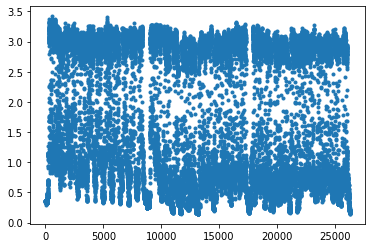

In [44]:
plt.plot(energy_df['Фактическое собственное потребление, МВтч'], '.')

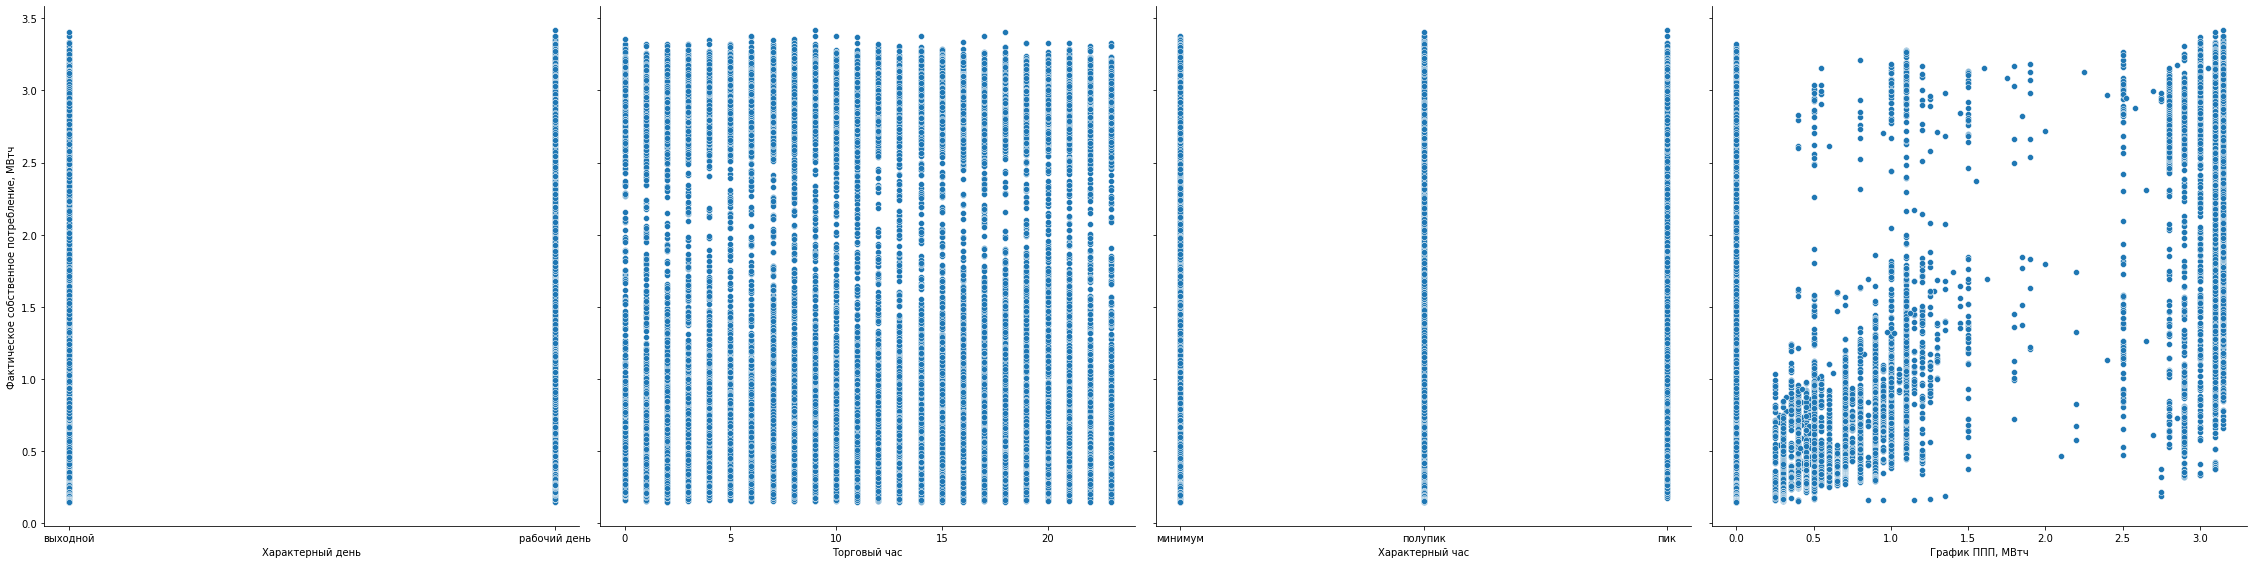

In [45]:
# fig, ax = plt.subplots(2, 2, figsize=(10, 8))

columns_to_plot = ['Характерный день', 'Торговый час', 'Характерный час',
                   'График ППП, МВтч']

g = sns.PairGrid(energy_df, x_vars=columns_to_plot,
                y_vars='Фактическое собственное потребление, МВтч',
                height=8)

g.map(sns.scatterplot)
# sns.scatterplot(data=energy_df, y='Фактическое собственное потребление, МВтч',
                                # x='Торговый час')
# распределение по часам: равномерное


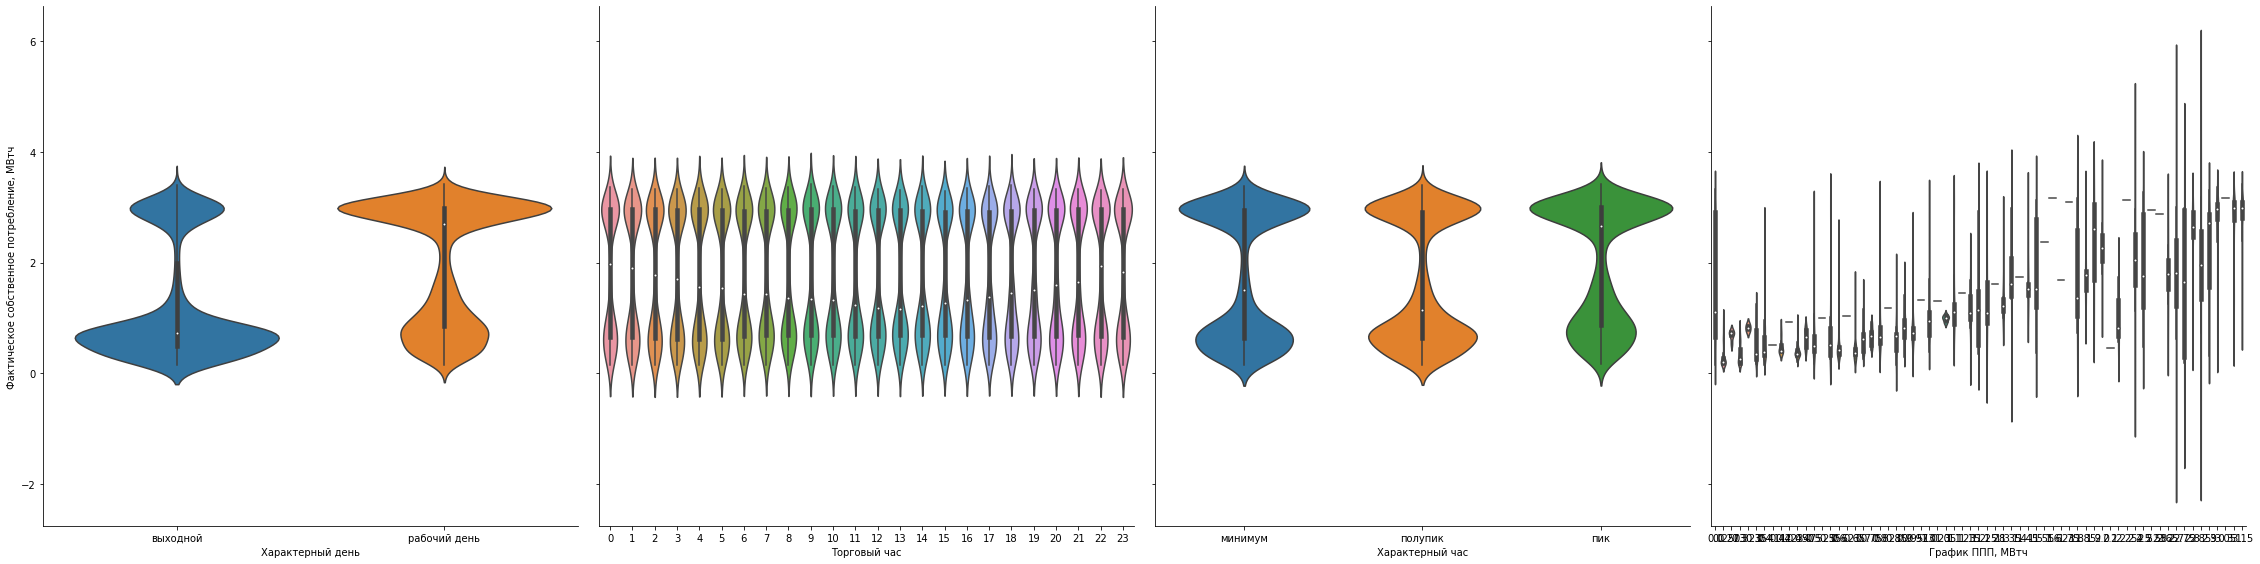

In [46]:
g = sns.PairGrid(energy_df, x_vars=columns_to_plot,
                y_vars='Фактическое собственное потребление, МВтч',
                height=8)

g.map(sns.violinplot)

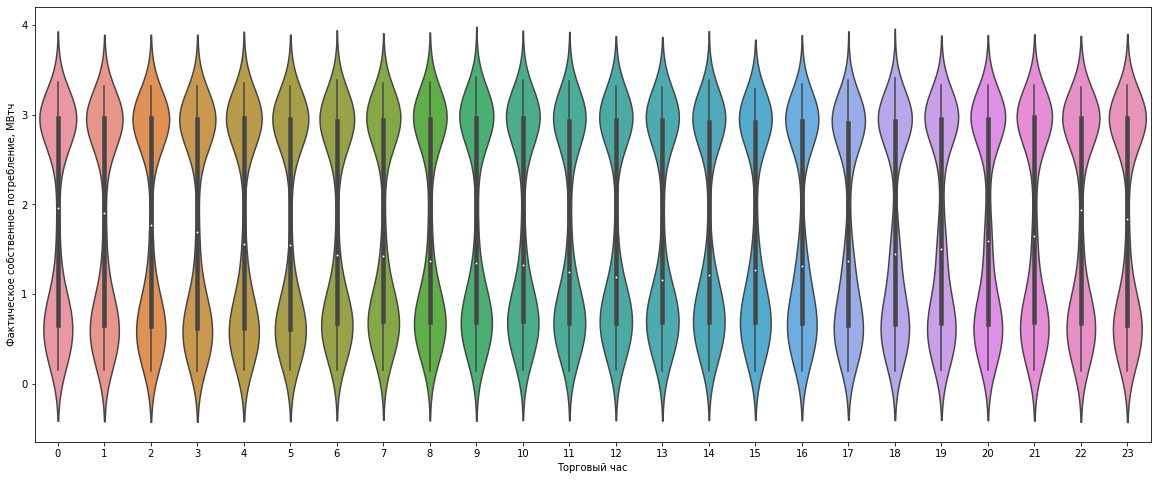

In [47]:
plt.subplots(figsize=(20, 8))
sns.violinplot(data=energy_df, x='Торговый час',
                y='Фактическое собственное потребление, МВтч')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


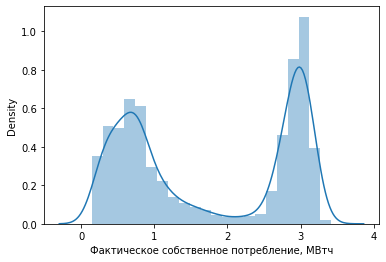

In [48]:
sns.distplot(energy_df['Фактическое собственное потребление, МВтч'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

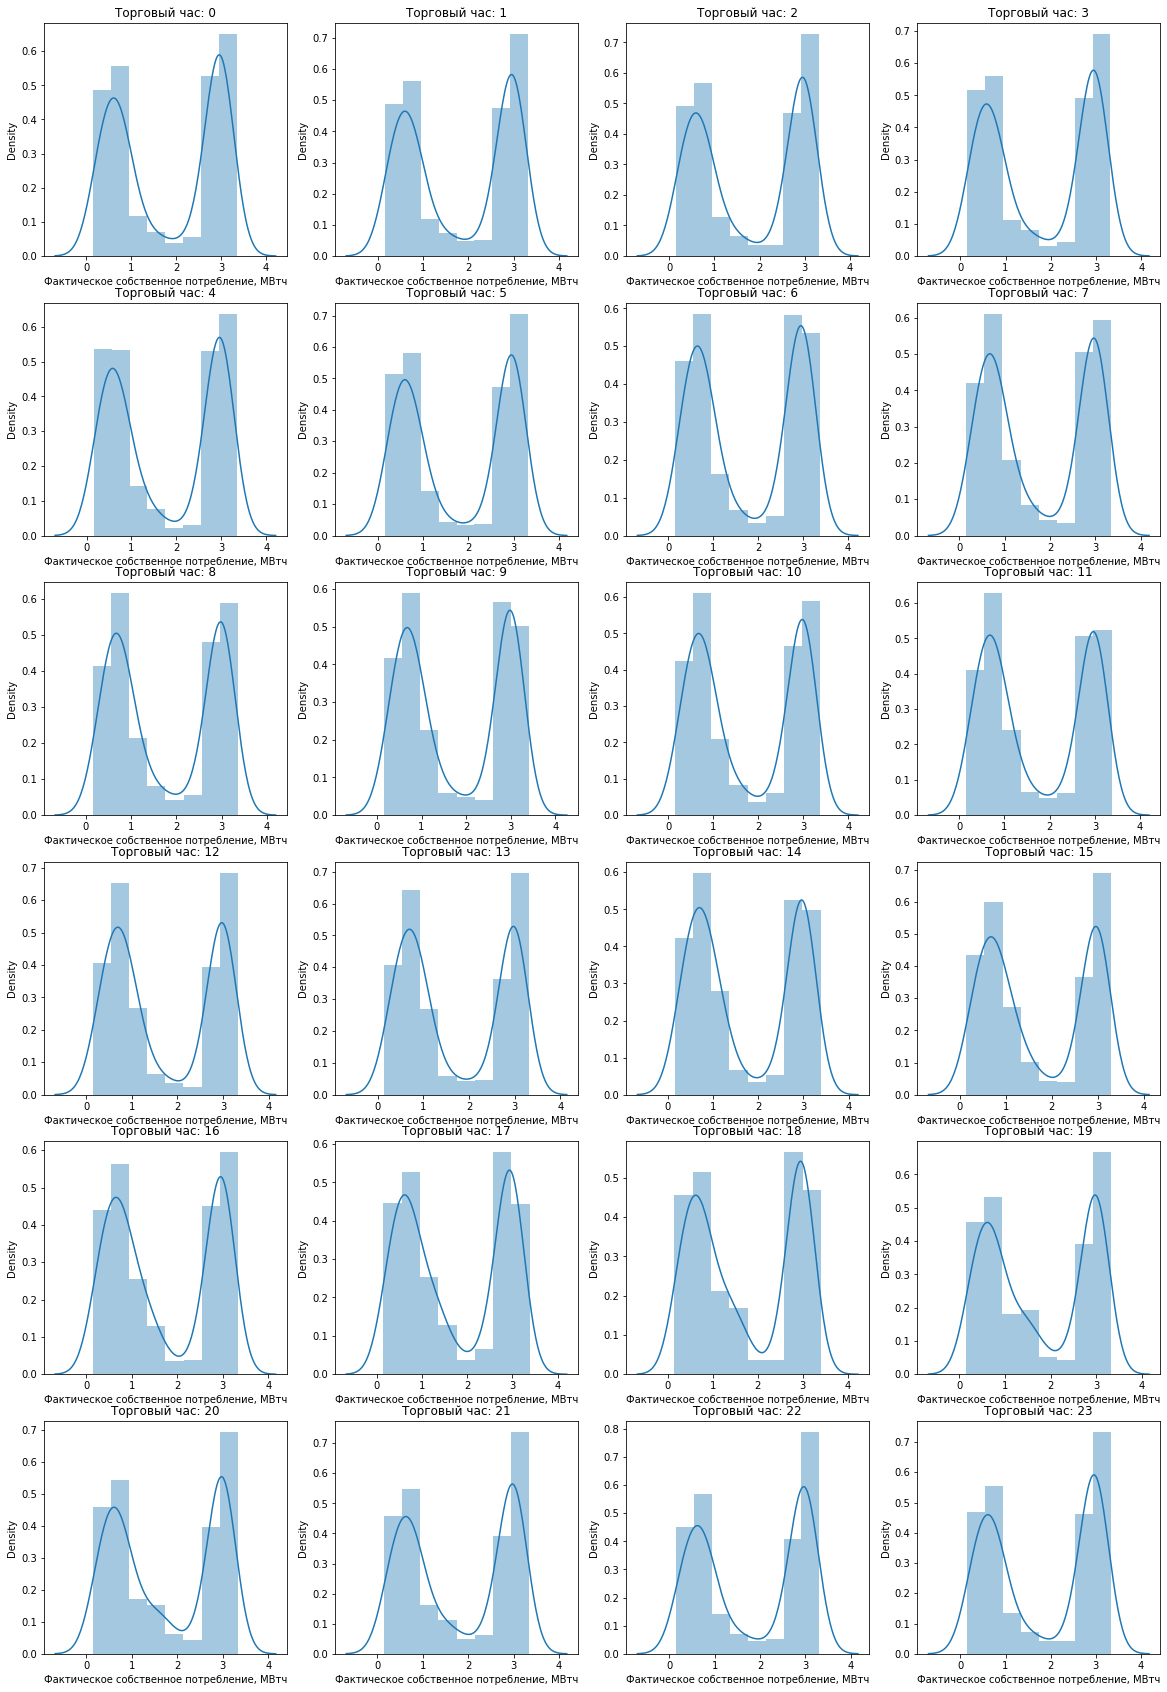

In [49]:
plt.subplots(figsize=(20, 30))

for i in range(24):
    plt.subplot(6, 4, i+1)
    sns.distplot(energy_df[energy_df['Торговый час'] == i]
                 ['Фактическое собственное потребление, МВтч']).set_title('Торговый час: %i' % i)

In [50]:
energy_df['DateTime'].min()

Timestamp('2015-01-01 00:00:00')

In [51]:
# energy_df['DateTime'] == plan_df['DateTime']
# plan_df['DateTime'].min()


# в файле plan.csv отсутствуют записи за несколько месяцев
# (energy.csv начинается с 01.01.2015, а plan.csv с 01.09.2015),
# следовательно необходимо убрать ту часть без записей

energy_df[energy_df['DateTime'] >= plan_df['DateTime'].min()]

DateTime Характерный день  Торговый час Характерный час  \
5832  2015-09-01     рабочий день             0         минимум   
5833  2015-09-01     рабочий день             1         минимум   
5834  2015-09-01     рабочий день             2         минимум   
5835  2015-09-01     рабочий день             3         минимум   
5836  2015-09-01     рабочий день             4         минимум   
...          ...              ...           ...             ...   
26299 2017-12-31         выходной            19         полупик   
26300 2017-12-31         выходной            20         полупик   
26301 2017-12-31         выходной            21         полупик   
26302 2017-12-31         выходной            22         минимум   
26303 2017-12-31         выходной            23         минимум   

       График ППП, МВтч  \
5832                1.1   
5833                1.1   
5834                1.1   
5835                1.1   
5836                2.5   
...                 ...   
26299               0.0   
26300               0.0   
26301               0.0   
26302               0.0   
26303               0.0   

       Объем Торгового графика (скорректированное плановое почасовое потребление) МВт*час  \
5832                                                 1.1                                    
5833                                                 1.1                                    
5834                                                 1.1                                    
5835                                                 1.1                                    
5836                                                 2.5                                    
...                                                  ...                                    
26299                                                0.0                                    
26300                                                0.0                                    
26301                                                0.0                                    
26302                                                0.0                                    
26303                                                0.0                                    

       Объем покупки МВт*час  В т.ч. потери, отнесенные к объему покупки  \
5832                   1.139                                       0.039   
5833                   1.140                                       0.040   
5834                   1.139                                       0.039   
5835                   1.140                                       0.040   
5836                   2.590                                       0.090   
...                      ...                                         ...   
26299                  0.000                                       0.000   
26300                  0.000                                       0.000   
26301                  0.000                                       0.000   
26302                  0.000                                       0.000   
26303                  0.000                                       0.000   

       Фактическое собственное потребление, МВтч  \
5832                                       1.544   
5833                                       1.535   
5834                                       1.365   
5835                                       1.469   
5836                                       1.463   
...                                          ...   
26299                                      0.159   
26300                                      0.152   
26301                                      0.154   
26302                                      0.146   
26303                                      0.145   

       Покупка (+) / Продажа (-) на БР (BR+/-), МВтч  \
5832                                           0.444   
5833                                           0.435   
5834                                           0.265   

In [52]:
new_features = ['DateTime', 'Характерный день', 'Торговый час',
                'Характерный час', 'Фактическое собственное потребление, МВтч']

energy_df_truncated = (energy_df[energy_df['DateTime'] >=               # урезаем таблицу energy_df до признаков new_features
                       plan_df['DateTime'].min()])[new_features].copy() # и по дате (чтобы совпадало с plan_df)

In [53]:
energy_df_truncated

DateTime Характерный день  Торговый час Характерный час  \
5832  2015-09-01     рабочий день             0         минимум   
5833  2015-09-01     рабочий день             1         минимум   
5834  2015-09-01     рабочий день             2         минимум   
5835  2015-09-01     рабочий день             3         минимум   
5836  2015-09-01     рабочий день             4         минимум   
...          ...              ...           ...             ...   
26299 2017-12-31         выходной            19         полупик   
26300 2017-12-31         выходной            20         полупик   
26301 2017-12-31         выходной            21         полупик   
26302 2017-12-31         выходной            22         минимум   
26303 2017-12-31         выходной            23         минимум   

       Фактическое собственное потребление, МВтч  
5832                                       1.544  
5833                                       1.535  
5834                                       1.365  
5835                                       1.469  
5836                                       1.463  
...                                          ...  
26299                                      0.159  
26300                                      0.152  
26301                                      0.154  
26302                                      0.146  
26303                                      0.145  

[20472 rows x 5 columns]

In [54]:
df = pd.merge(energy_df_truncated, plan_df, on='DateTime') # объединяем таблицы энергий и плана по дате

In [55]:
df.columns.shape

(13,)

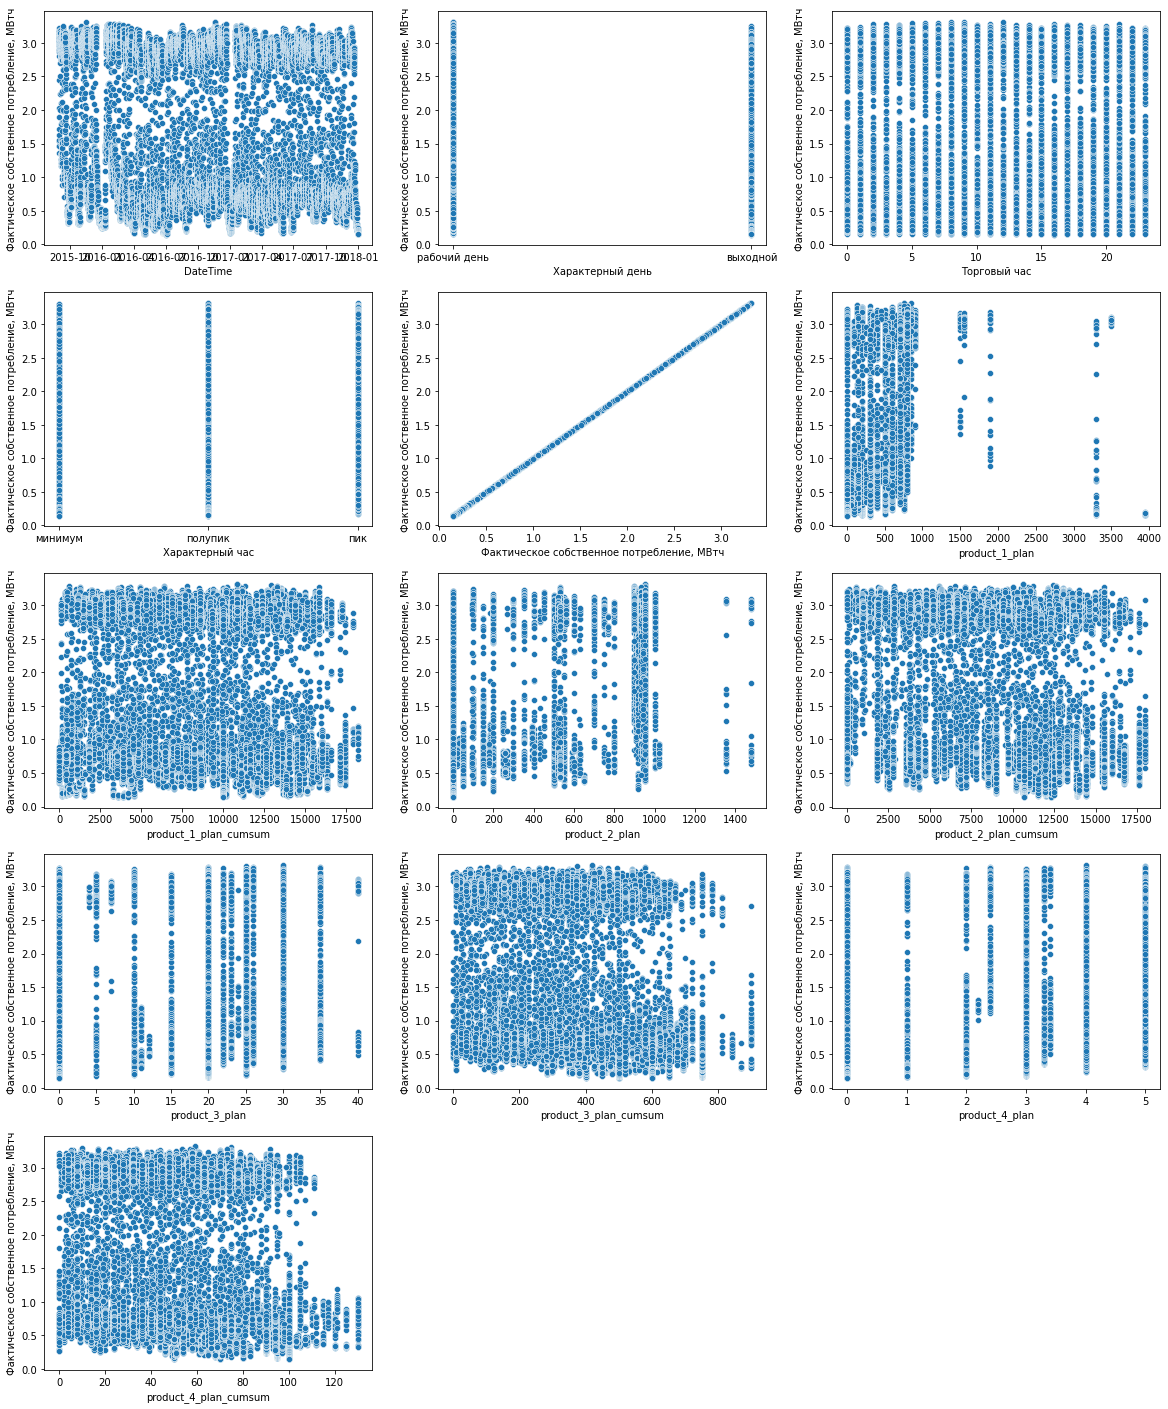

In [56]:
df.columns

plt.subplots(figsize=(20, 25))
for i, col in enumerate(df.columns):
    plt.subplot(5, 3, i+1)
    sns.scatterplot(data=df, x=col,
                    y='Фактическое собственное потребление, МВтч')

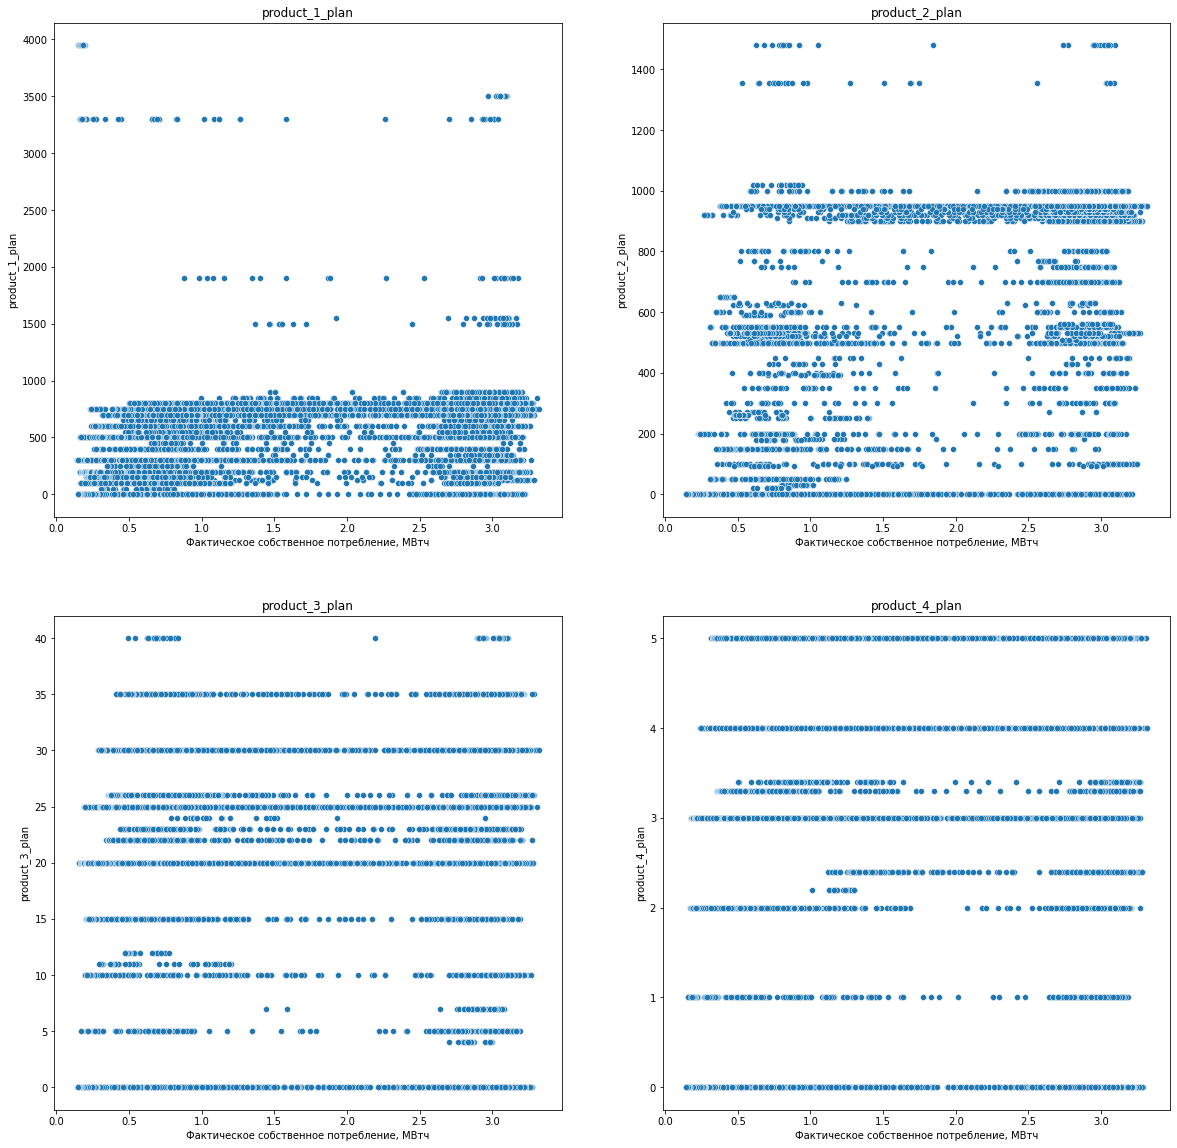

In [57]:
products = ['product_%i_plan' % i for i in range(1, 5)]
plt.subplots(figsize=(20, 20))

for i, prod in enumerate(products):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=df['Фактическое собственное потребление, МВтч'],
                   y=df[prod]).set_title(prod)

In [58]:
print(np.corrcoef(df['product_1_plan'], df['product_2_plan']))
print(np.corrcoef(df['product_1_plan'], df['product_3_plan']))
print(np.corrcoef(df['product_1_plan'], df['product_4_plan']))
print(np.corrcoef(df['product_2_plan'], df['product_3_plan']))
print(np.corrcoef(df['product_2_plan'], df['product_3_plan']))
print(np.corrcoef(df['product_3_plan'], df['product_4_plan']))

[[1.         0.50933782]
 [0.50933782 1.        ]]
[[1.        0.2158079]
 [0.2158079 1.       ]]
[[1.         0.28137478]
 [0.28137478 1.        ]]
[[1.         0.20852582]
 [0.20852582 1.        ]]
[[1.         0.20852582]
 [0.20852582 1.        ]]
[[1.         0.54603709]
 [0.54603709 1.        ]]


In [59]:
print(np.corrcoef(df['Фактическое собственное потребление, МВтч'], df['product_1_plan']))
print(np.corrcoef(df['Фактическое собственное потребление, МВтч'], df['product_2_plan']))
print(np.corrcoef(df['Фактическое собственное потребление, МВтч'], df['product_3_plan']))
print(np.corrcoef(df['Фактическое собственное потребление, МВтч'], df['product_4_plan']))
print(np.corrcoef(df['Фактическое собственное потребление, МВтч'], df['Торговый час']))

[[1.         0.52295186]
 [0.52295186 1.        ]]
[[1.         0.85229201]
 [0.85229201 1.        ]]
[[1.         0.25048845]
 [0.25048845 1.        ]]
[[1.       0.293771]
 [0.293771 1.      ]]
[[ 1.         -0.00643857]
 [-0.00643857  1.        ]]


In [60]:
df

DateTime Характерный день  Торговый час Характерный час  \
0     2015-09-01     рабочий день             0         минимум   
1     2015-09-01     рабочий день             1         минимум   
2     2015-09-01     рабочий день             2         минимум   
3     2015-09-01     рабочий день             3         минимум   
4     2015-09-01     рабочий день             4         минимум   
...          ...              ...           ...             ...   
20467 2017-12-31         выходной            19         полупик   
20468 2017-12-31         выходной            20         полупик   
20469 2017-12-31         выходной            21         полупик   
20470 2017-12-31         выходной            22         минимум   
20471 2017-12-31         выходной            23         минимум   

       Фактическое собственное потребление, МВтч  product_1_plan  \
0                                          1.544          1500.0   
1                                          1.535          1500.0   
2                                          1.365          1500.0   
3                                          1.469          1500.0   
4                                          1.463          1500.0   
...                                          ...             ...   
20467                                      0.159             0.0   
20468                                      0.152             0.0   
20469                                      0.154             0.0   
20470                                      0.146             0.0   
20471                                      0.145             0.0   

       product_1_plan_cumsum  product_2_plan  product_2_plan_cumsum  \
0                     1500.0           100.0                  100.0   
1                     1500.0           100.0                  100.0   
2                     1500.0           100.0                  100.0   
3                     1500.0           100.0                  100.0   
4                     1500.0           100.0                  100.0   
...                      ...             ...                    ...   
20467                10000.0             0.0                10700.0   
20468                10000.0             0.0                10700.0   
20469                10000.0             0.0                10700.0   
20470                10000.0             0.0                10700.0   
20471                10000.0             0.0                10700.0   

       product_3_plan  product_3_plan_cumsum  product_4_plan  \
0                25.0                   25.0             5.0   
1                25.0                   25.0             5.0   
2                25.0                   25.0             5.0   
3                25.0                   25.0             5.0   
4                25.0                   25.0             5.0   
...               ...                    ...             ...   
20467             0.0                  600.0             0.0   
20468             0.0                  600.0             0.0   
20469             0.0                  600.0             0.0   
20470             0.0                  600.0             0.0   
20471             0.0                  600.0             0.0   

       product_4_plan_cumsum  
0                        5.0  
1                        5.0  
2                        5.0  
3                        5.0  
4                        5.0  
...                      ...  
20467                  100.0  
20468                  100.0  
20469                  100.0  
20470                  100.0  
20471                  100.0  

[20472 rows x 13 columns]

In [61]:
df = pd.concat((pd.get_dummies(df['Торговый час']), #применим one hot encoding для категориальных данных
                pd.get_dummies(df['Характерный час']),
                pd.get_dummies(df['Характерный день']),
                df), axis=1)

df.drop(columns=['Характерный час', # уберём столбцы с категориями
                 'Характерный день'], inplace=True)

In [62]:
df

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  \
0      1  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   
1      0  1  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   
2      0  0  1  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   
3      0  0  0  1  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   
4      0  0  0  0  1  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   
...   .. .. .. .. .. .. .. .. .. ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
20467  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   1   
20468  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   
20469  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   
20470  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   
20471  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   

       20  21  22  23  минимум  пик  полупик  выходной  рабочий день  \
0       0   0   0   0        1    0        0         0             1   
1       0   0   0   0        1    0        0         0             1   
2       0   0   0   0        1    0        0         0             1   
3       0   0   0   0        1    0        0         0             1   
4       0   0   0   0        1    0        0         0             1   
...    ..  ..  ..  ..      ...  ...      ...       ...           ...   
20467   0   0   0   0        0    0        1         1             0   
20468   1   0   0   0        0    0        1         1             0   
20469   0   1   0   0        0    0        1         1             0   
20470   0   0   1   0        1    0        0         1             0   
20471   0   0   0   1        1    0        0         1             0   

        DateTime  Торговый час  Фактическое собственное потребление, МВтч  \
0     2015-09-01             0                                      1.544   
1     2015-09-01             1                                      1.535   
2     2015-09-01             2                                      1.365   
3     2015-09-01             3                                      1.469   
4     2015-09-01             4                                      1.463   
...          ...           ...                                        ...   
20467 2017-12-31            19                                      0.159   
20468 2017-12-31            20                                      0.152   
20469 2017-12-31            21                                      0.154   
20470 2017-12-31            22                                      0.146   
20471 2017-12-31            23                                      0.145   

       product_1_plan  product_1_plan_cumsum  product_2_plan  \
0              1500.0                 1500.0           100.0   
1              1500.0                 1500.0           100.0   
2              1500.0                 1500.0           100.0   
3              1500.0                 1500.0           100.0   
4              1500.0                 1500.0           100.0   
...               ...                    ...             ...   
20467             0.0                10000.0             0.0   
20468             0.0                10000.0             0.0   
20469             0.0                10000.0             0.0   
20470             0.0                10000.0             0.0   
20471             0.0                10000.0             0.0   

       product_2_plan_cumsum  product_3_plan  product_3_plan_cumsum  \
0                      100.0            25.0                   25.0   
1                      100.0            25.0                   25.0   
2                      100.0            25.0                   25.0   
3                      100.0            25.0                   25.0   
4                      100.0            25.0                   25.0   
...                      ...             ...                    ...   
20

In [63]:
df_train = df[df['DateTime'] < '2017-08-01']
df_test = df[df['DateTime'] >= '2017-08-01']

In [64]:
columns_to_drop = ['product_%i_plan_cumsum' %i for i in range(1, 5)]
columns_to_drop.append('DateTime')
columns_to_drop.append('Фактическое собственное потребление, МВтч')
columns_to_drop.append('Торговый час')
columns_to_drop

['product_1_plan_cumsum',
 'product_2_plan_cumsum',
 'product_3_plan_cumsum',
 'product_4_plan_cumsum',
 'DateTime',
 'Фактическое собственное потребление, МВтч',
 'Торговый час']

In [65]:
def try_regressor(regressor):
    regressor.fit(df_train.drop(columns=columns_to_drop),
                  df_train['Фактическое собственное потребление, МВтч'])
    
    preds = regressor.predict(df_test.drop(columns=columns_to_drop))
    y_test = df_test['Фактическое собственное потребление, МВтч'].to_numpy()

    plt.subplots(figsize=(25, 10))

    plt.plot(preds, label='predictions')
    plt.plot(y_test, label='test')
    plt.legend()

    MAE = sklearn.metrics.mean_absolute_error(
        df_test['Фактическое собственное потребление, МВтч'],
                                                    preds)
    plt.title(str(regressor) + f' MAE = {MAE}')

    print(f'MAE = {MAE}')

In [66]:
str(sklearn.linear_model.LinearRegression())[:20]

'LinearRegression(cop'

MAE = 0.27579623219013993


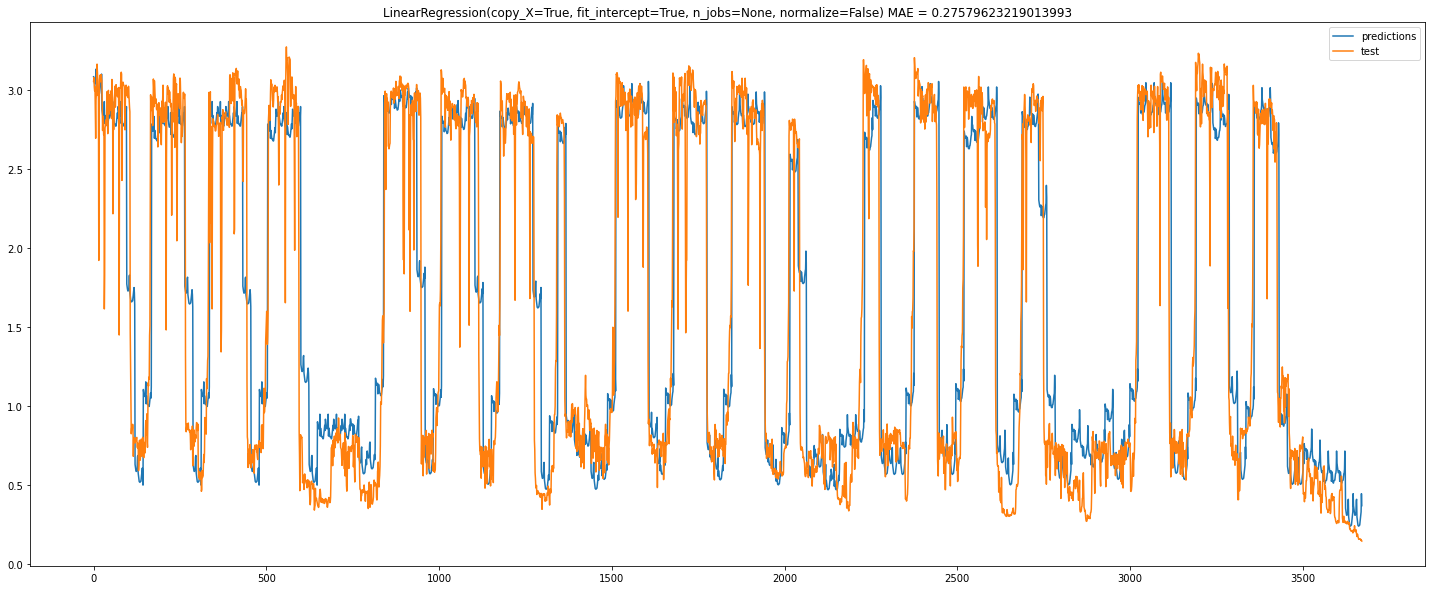

In [67]:
try_regressor(sklearn.linear_model.LinearRegression())

MAE = 0.28175344864226515


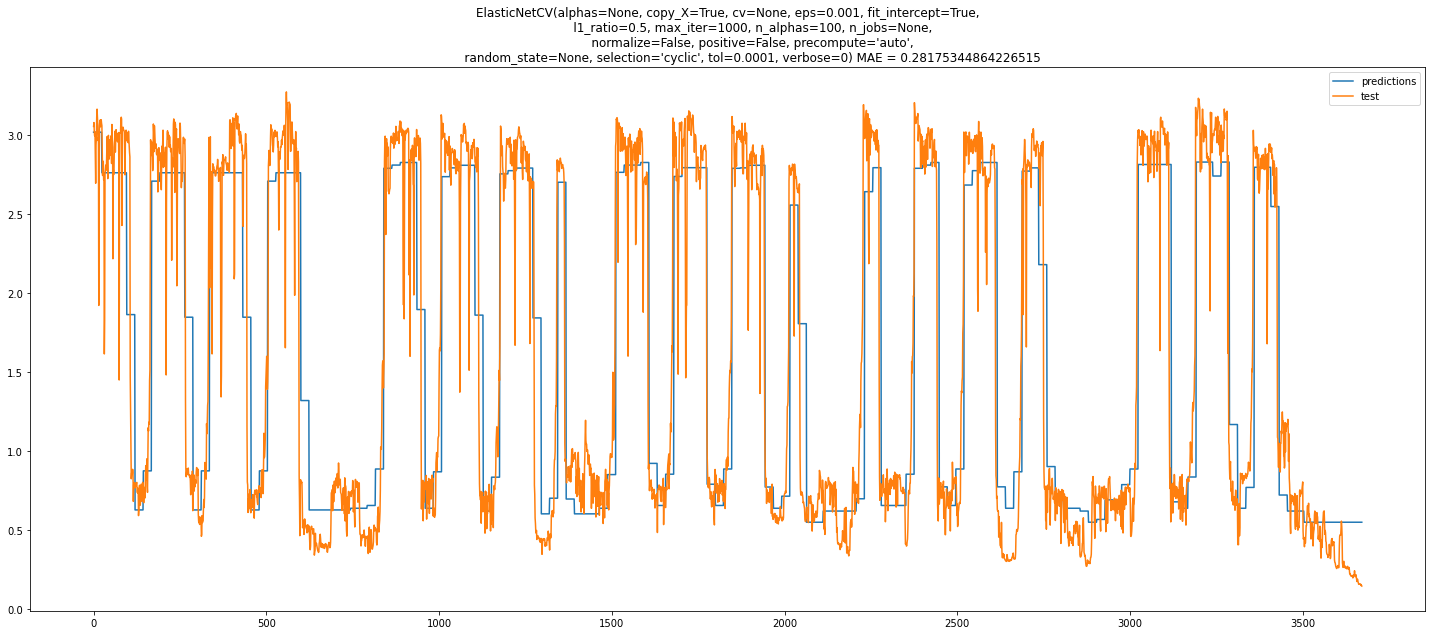

In [68]:
try_regressor(sklearn.linear_model.ElasticNetCV())

MAE = 0.2799608585548823


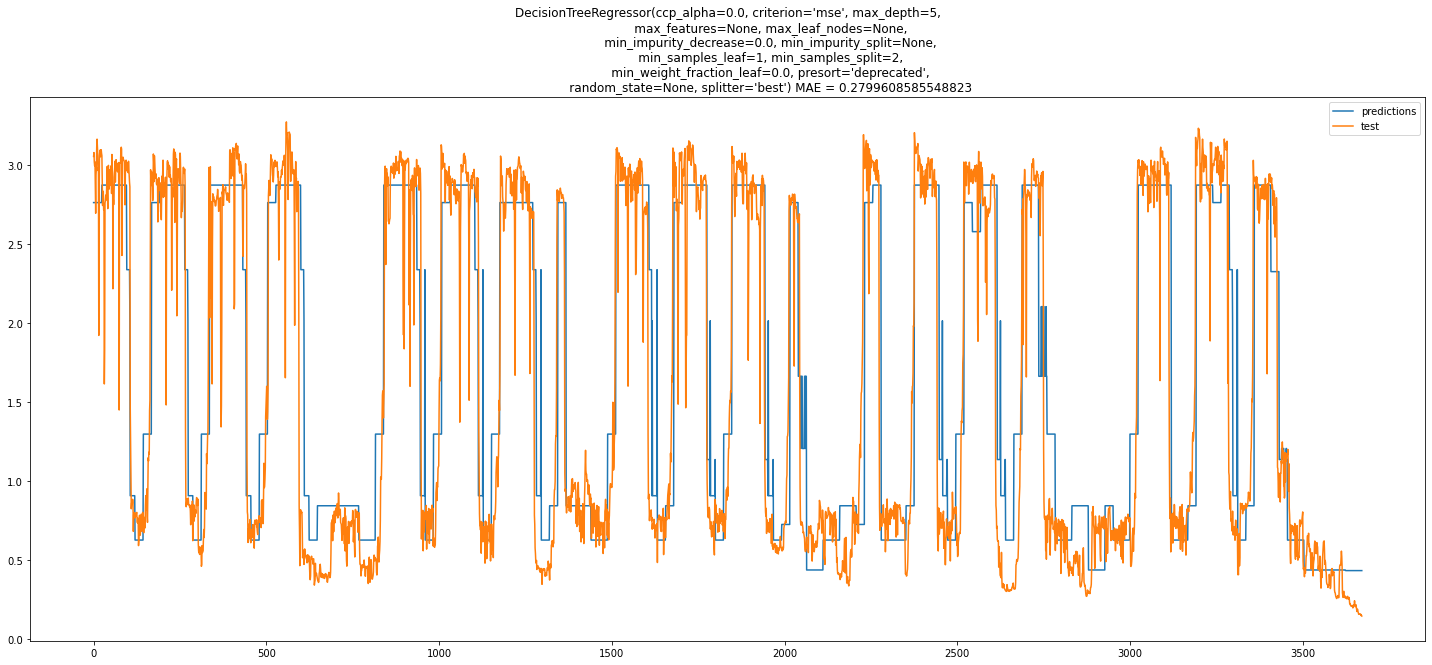

In [69]:
try_regressor(sklearn.tree.DecisionTreeRegressor(max_depth=5))

MAE = 0.25897039527080584


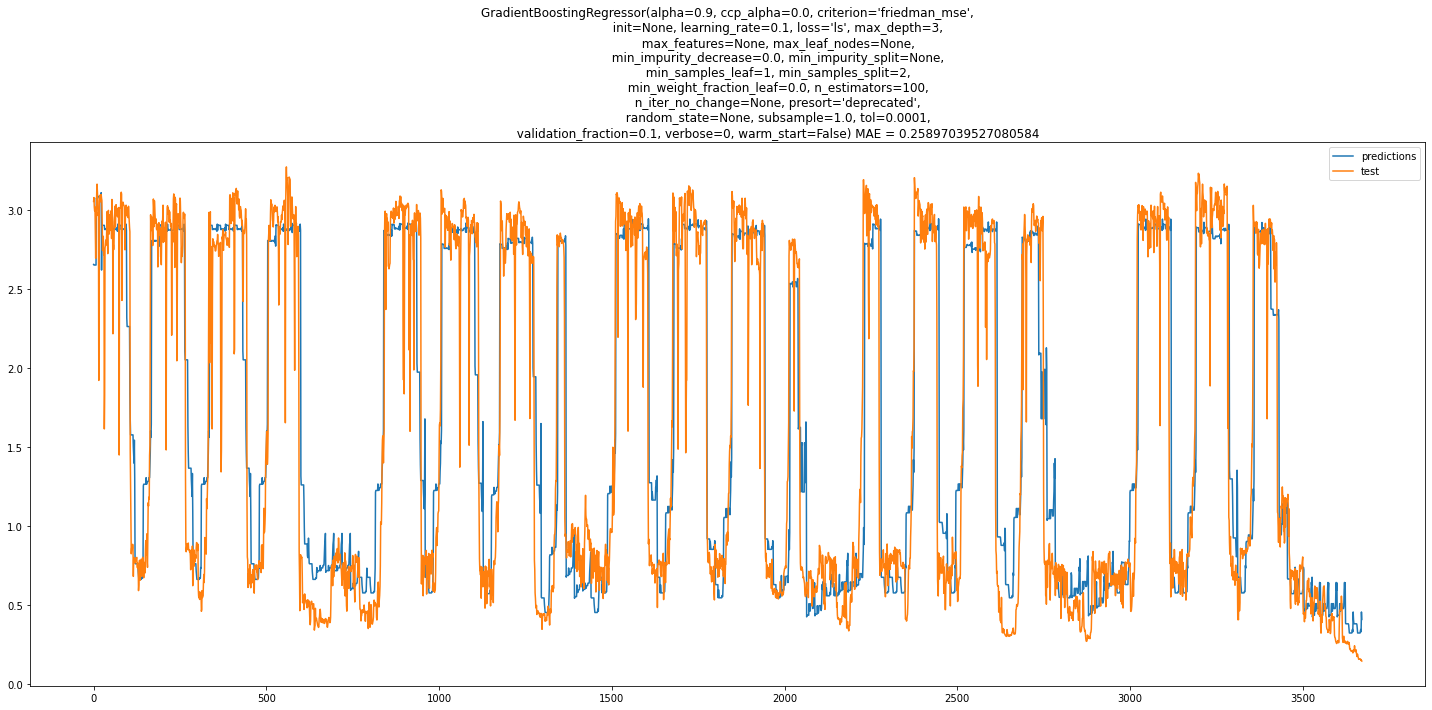

In [70]:
try_regressor(sklearn.ensemble.GradientBoostingRegressor())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


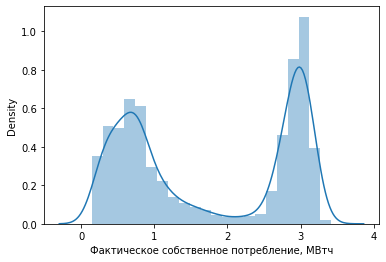

In [71]:
sns.distplot(energy_df['Фактическое собственное потребление, МВтч'])

In [72]:
# print(df[df['Фактическое собственное потребление, МВтч'] < 2]['Фактическое собственное потребление, МВтч'].mean())
# print(df[df['Фактическое собственное потребление, МВтч'] >= 2]['Фактическое собственное потребление, МВтч'].mean())

# class_0 = (df[df['Фактическое собственное потребление, МВтч'] <
#          df['Фактическое собственное потребление, МВтч'].max() / 2]
#             ['Фактическое собственное потребление, МВтч'].mean())

# print(df[df['Фактическое собственное потребление, МВтч'] >=
#          df['Фактическое собственное потребление, МВтч'].max() / 2]
#       ['Фактическое собственное потребление, МВтч'].mean())

class_0 = 0.7
class_1 = 3.0

class_border = 2.0

In [73]:
df['class'] = -1
df['shift'] = 500

In [74]:
# df[df['Фактическое собственное потребление, МВтч'] < class_border]['class'] = 0
# df[df['Фактическое собственное потребление, МВтч'] >= class_border]['class'] = 1

for i in range(df.shape[0]):
    if (df.loc[i, 'Фактическое собственное потребление, МВтч'] < class_border):
        df.loc[i, 'class'] = 0
        df.loc[i, 'shift'] = df.loc[i, 'Фактическое собственное потребление, МВтч'] - class_0
    else:
        df.loc[i, 'class'] = 1
        df.loc[i, 'shift'] = df.loc[i, 'Фактическое собственное потребление, МВтч'] - class_1

In [79]:
df[df['class'] == -1].empty and df[df['shift'] == 500].empty # проверяем, что все строки заполнены

True

In [15]:
df

NameError: ignored

In [16]:
df[df['class'] == 1]

NameError: ignored

In [17]:
class_0

NameError: ignored

In [18]:
df['Фактическое собственное потребление, МВтч'].mean()

NameError: ignored